# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time','reward', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _,reward, done = task.step(rotor_speeds)
        to_write = [task.sim.time] +[str(reward)]+ list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

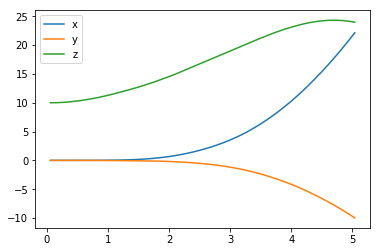

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

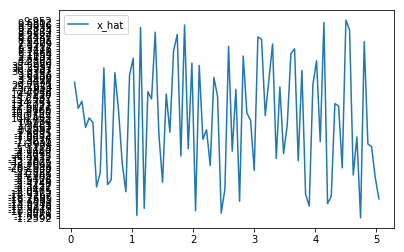

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['reward'], label='x_hat')
plt.legend()
_ = plt.ylim()

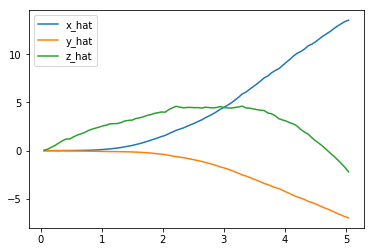

In [31]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

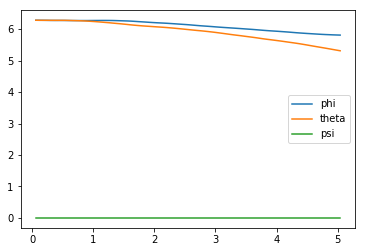

In [32]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

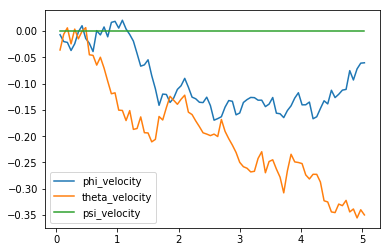

In [33]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

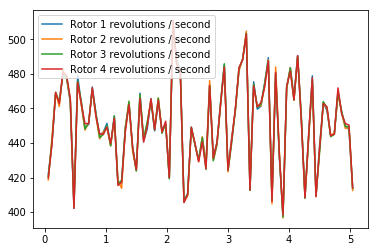

In [34]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [35]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 22.14107773  -9.98939616  23.97242152   5.81088411   5.31268438   0.        ]
[ 13.52012016  -6.97153149  -2.19548614]
[-0.06051561 -0.34966161  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

import csv
import numpy as np

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 
labels = ['time','reward', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
evaluate={'ep':[],
          'av_reward':[]
         }
time=0
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    step=0
    av_reward=0
    while True:
        step+=1
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        
        av_reward+=reward
        time +=task.sim.time
        to_write = [time]+[str(reward)]+ list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  951, score =  31.411 (best =  40.616), noise_scale = 3.2625

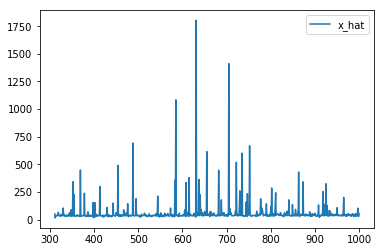

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(evaluate['ep'][310:], evaluate['av_reward'][310:], label='x_hat')
plt.legend()
_ = plt.ylim()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [6]:
import sys
import pandas as pd
import numpy as np
from agents.agent import DDPG
from task import Task

target_pos = np.array([0., 0., 500.,0.,0.,0.])
init_pose = np.array([0., 0., 10.,0.,0.,0.])
init_velocities = np.array([0., 0., 10.])         # initial velocities
runtime=5
task = Task(init_pose=init_pose,init_velocities=init_velocities,target_pos=target_pos,runtime=runtime)
agent = DDPG(task)

%reload_ext autoreload
%autoreload 2
file_output = 'data.txt'
num_episodes = 500


labels = ['ep','reward','avx','avy','avz','zl', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}


for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    # variable to take the average of the data
    r=0
    s=0
    x=0
    y=0
    z=0
    zl=0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(next_state=next_state,action=action,reward=reward, done=done)
        state = next_state
        r+=reward
        x+=task.sim.pose[0]-target_pos[0]
        y+=task.sim.pose[1]-target_pos[1]
        z+=task.sim.pose[2]-target_pos[2]
        zl+=task.sim.pose[2]
        s+=1
        if done:
            to_write = [i_episode]+[str(round(agent.score,3))]+[str(int(x/s))]+[str(int(y/s))]+[str(int(z/s))]+[str(round(zl/s,2))]+ list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}) (r/s = {:7.3f})\n".format(
                i_episode, agent.score, agent.best_score, r/s), end="")  # [debug]
                
            break


Episode =    1, score =   0.000 (best = -1000.000) (r/s =   0.247)
Episode =    2, score =   0.272 (best =   0.359) (r/s =   0.267)
Episode =    3, score =   0.067 (best =   1.671) (r/s =   0.062)
Episode =    4, score =   0.111 (best =   1.680) (r/s =   0.105)
Episode =    5, score =   0.180 (best =   1.687) (r/s =   0.174)
Episode =    6, score =   0.034 (best =   1.688) (r/s =   0.027)
Episode =    7, score =   0.165 (best =   1.688) (r/s =   0.159)
Episode =    8, score =   0.150 (best =   1.688) (r/s =   0.145)
Episode =    9, score =   0.173 (best =   1.688) (r/s =   0.170)
Episode =   10, score =   0.219 (best =   1.688) (r/s =   0.214)
Episode =   11, score =   0.201 (best =   1.717) (r/s =   0.195)
Episode =   12, score =   0.098 (best =   1.717) (r/s =   0.094)
Episode =   13, score =   0.232 (best =   1.717) (r/s =   0.226)
Episode =   14, score =   1.081 (best =   1.717) (r/s =   1.065)
Episode =   15, score =   0.141 (best =   1.717) (r/s =   0.136)
Episode =   16, score =

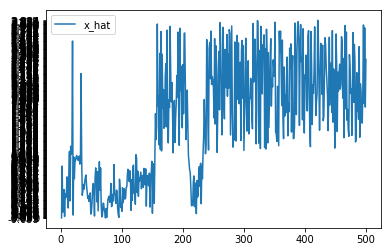

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# fig=plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(results['ep'], results['reward'], label='x_hat')
# plt.plot(results['ep'], results['z'], label='x_hat')
plt.legend()
_ = plt.ylim()## TODO: Plot the rewards.

In [18]:

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
r = {x : [] for x in labels}

# Run the simulation, and save the results.
state = agent.reset_episode()
total_reward = 0
while True:
    rotor_speeds = agent.act(state)
    next_state, reward, done = task.step(rotor_speeds)
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
    for ii in range(len(labels)):
        r[labels[ii]].append(to_write[ii])
    total_reward += reward
    state = next_state
    if done:
        print("Total episode reward : {}".format(total_reward))
        total_reward = 0
        break

Total episode reward : 321.10304809127393


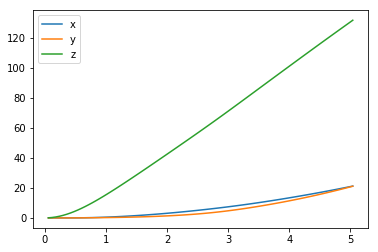

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(r['time'], r['x'], label='x')
plt.plot(r['time'], r['y'], label='y')
plt.plot(r['time'], r['z'], label='z')
plt.legend()
_ = plt.ylim()

In [13]:
import sys
import pandas as pd
import numpy as np
from agents.agent import DDPG
from task import Task

target_pos = np.array([0., 0., 500.,0.,0.,0.])
init_pose = np.array([0., 0., 10.,0.,0.,0.])
init_velocities = np.array([0., 0., 10.])         # initial velocities
runtime=5
task = Task(init_pose=init_pose,init_velocities=init_velocities,target_pos=target_pos,runtime=runtime)
agent = DDPG(task)

%reload_ext autoreload
%autoreload 2
file_output = 'data.txt'
num_episodes = 500


labels = ['ep','reward','avx','avy','avz','zl', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}


for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    # variable to take the average of the data
    r=0
    s=0
    x=0
    y=0
    z=0
    zl=0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(next_state=next_state,action=action,reward=reward, done=done)
        state = next_state
        r+=reward
        x+=task.sim.pose[0]-target_pos[0]
        y+=task.sim.pose[1]-target_pos[1]
        z+=task.sim.pose[2]-target_pos[2]
        zl+=task.sim.pose[2]
        s+=1
        if done:
            to_write = [i_episode]+[str(round(agent.score,3))]+[str(int(x/s))]+[str(int(y/s))]+[str(int(z/s))]+[str(round(zl/s,2))]+ list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}) (r/s = {:7.3f})\n".format(
                i_episode, agent.score, agent.best_score, r/s), end="")  # [debug]
                
            break


Episode =    1, score =   0.000 (best = -1000.000) (r/s =   0.212)
Episode =    2, score =   0.217 (best =   0.233) (r/s =   0.212)
Episode =    3, score =   0.172 (best =   1.656) (r/s =   0.167)
Episode =    4, score =   0.156 (best =   1.656) (r/s =   0.151)
Episode =    5, score =   0.101 (best =   1.656) (r/s =   0.098)
Episode =    6, score =   0.146 (best =   1.656) (r/s =   0.140)
Episode =    7, score =   0.157 (best =   1.660) (r/s =   0.152)
Episode =    8, score =   0.188 (best =   1.660) (r/s =   0.184)
Episode =    9, score =   0.166 (best =   1.660) (r/s =   0.163)
Episode =   10, score =   0.184 (best =   1.660) (r/s =   0.180)
Episode =   11, score =   0.175 (best =   1.660) (r/s =   0.171)
Episode =   12, score =   0.175 (best =   1.660) (r/s =   0.171)
Episode =   13, score =   0.170 (best =   1.660) (r/s =   0.166)
Episode =   14, score =   0.189 (best =   1.660) (r/s =   0.185)
Episode =   15, score =   0.171 (best =   1.660) (r/s =   0.167)
Episode =   16, score =

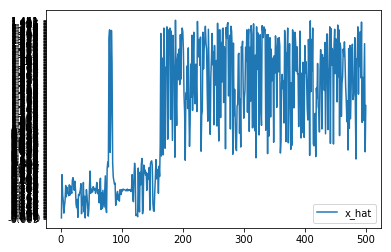

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# fig=plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(results['ep'], results['reward'], label='x_hat')
# plt.plot(results['ep'], results['z'], label='x_hat')
plt.legend()
_ = plt.ylim()## TODO: Plot the rewards.

### Store the weights of the network if the performance is improved

In [38]:
agent.actor_local.model.save_weights("actor_local.h5")
agent.actor_target.model.save_weights("actor_target.h5")
agent.critic_local.model.save_weights("critic_local.h5")
agent.critic_target.model.save_weights("critic_target.h5")

### Final testing of the agent into a single episode

In [31]:

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
r = {x : [] for x in labels}

# Run the simulation, and save the results.
state = agent.reset_episode()
total_reward = 0
while True:
    rotor_speeds = agent.act(state)
    next_state, reward, done = task.step(rotor_speeds)
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
    for ii in range(len(labels)):
        r[labels[ii]].append(to_write[ii])
    total_reward += reward
    state = next_state
    if done:
        print("Total episode reward : {}".format(total_reward))
        total_reward = 0
        break

Total episode reward : 297.0086787439688


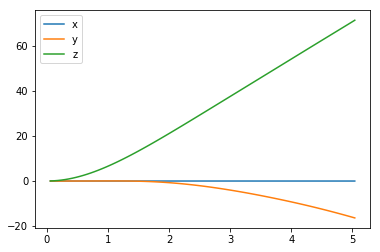

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(r['time'], r['x'], label='x')
plt.plot(r['time'], r['y'], label='y')
plt.plot(r['time'], r['z'], label='z')
plt.legend()
_ = plt.ylim()

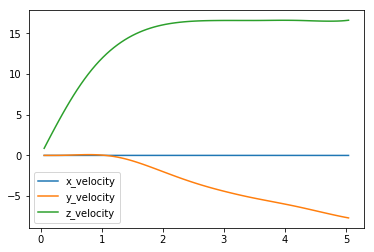

In [33]:

plt.plot(r['time'], r['x_velocity'], label='x_velocity')
plt.plot(r['time'], r['y_velocity'], label='y_velocity')
plt.plot(r['time'], r['z_velocity'], label='z_velocity')
plt.legend()
_ = plt.ylim()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 




### Filnal rewards

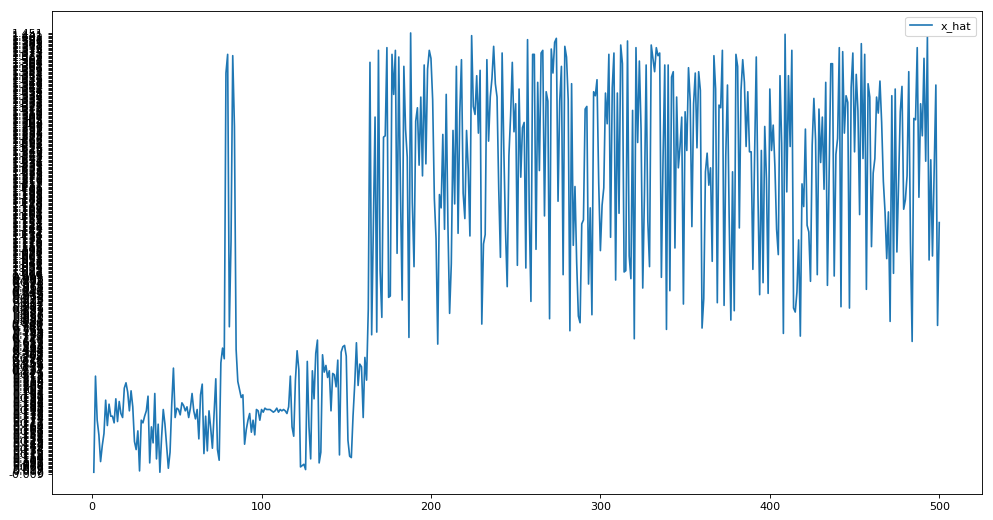

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
# results['reward'] = map(int, results['reward'])
plt.plot(results['ep'], results['reward'], label='x_hat')
plt.legend()
_ = plt.ylim()## TODO: Plot the rewards.

### Average coordinates values of the agent during the training to see its overall behaviour over the training process.

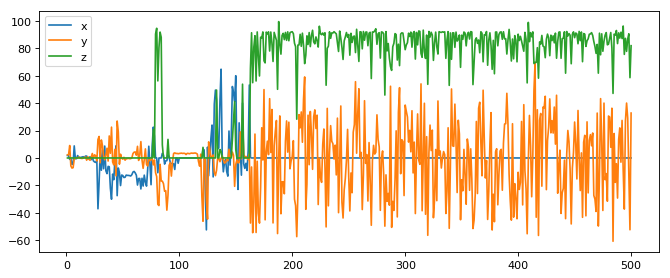

In [35]:
# average coordinate values 
fig=plt.figure(figsize=(10,4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(results['ep'], results['x'], label='x')
plt.plot(results['ep'], results['y'], label='y')
plt.plot(results['ep'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

#  in the final results we can relate the reward graph with this, 
#  as high z coordinates gave high reards

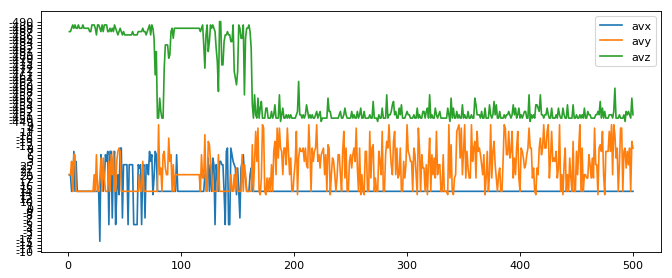

In [36]:
# average difference between the target and the current position
fig=plt.figure(figsize=(10,4), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(results['ep'], results['avx'], label='avx')
plt.plot(results['ep'], results['avy'], label='avy')
plt.plot(results['ep'], results['avz'], label='avz')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
Task.py : the file contains the function to generate the reward for the agent depending on the new state of the quadcopter
Task: 

TakeOff-
This is the simple task in which I wanted the quadcopter to go approximately straight up.
Reward statement: It create a feedback to the agent for the action it selected, hence I chose the following points to do that:-
- distance from the target position, to make the quadcopter reach the target as soon as possible .
- its velocity in the direction of the target, as to encourage the agent to increase the velocity
- current angular change difference to decrease  unexpected behaviour of the copter and have a smooth flight
Hence making the following reward statements:

1) Distance:-The average absolute difference in the coordinates of the quadcopter and target. To bring it into the limits I used 'tanh', as it bought the whole reward into a fixed range i.e

      reward= 1 - tanh(abs(current_position - target_position)* alpha).sum

where alpha is a constant factor that how much we want to distance of each coordinate to effect the reward of the agent.

2) Velocity:- In the above equation I added a velocity factor which is:
    if velocity is <= distance:
        velocity_factor = velocity - distance
    else:
        velocity_factor = distance - velocity
        
than I added this velocity factor to the current reward with ‘tanh’ functions to bring this also into a range of -1 to 1,

    reward += tanh(velocity_factor * beta).sum

the velocity factor can also be added in other form to just support the upward motion .i.e only using the factor of the velocity in z axis 

    reward += tanh(velocity_z * beta)

where 'beta' is a constant factor to bring the data into range.
3) Change in Z axis: as I wanted it to get more reward as it goes up, hence  I calculated the change in the z axis I every step ans assign a reward factor with that .i.e

    reward+= np.tanh(self.sim.pose[2] - self.last_z)

My overall focus on the designing of this reward function was to give a feedback to the quadcopter at its every step such that it gets a positive reward every time it tries to increase its velocity in z direction or move up. I also tried many combinations of the above 3 parts for example:-

1.reward= 1- np.tanh(dis*alpha).sum()+np.tanh(z)   
2.reward=1- np.tanh(dis*alpha).sum()+np.tanh(max(self.sim.v[2]*0.009,0))+np.tanh(z)   
3.reward=1- np.tanh(dis*alpha).sum() + np.tanh(vel*alpha).sum()   
4.reward=1- np.tanh(dis*0.003).sum() + np.tanh(vel*0.003).sum() - np.tanh(angle*0.003).sum()   

In 3rd and 4th the overall velocity factor tanh(vel*alpha).sum didn't worked as expected due to almost same results in all kind of situation. finally I got these results with the 2nd statement.


State:

For states I tried 2 different sets of information:

1. With the simple coordinate and angle in set of 3 frames making a state size of 18
2. 2nd with a set of 3 frames, of current coordinate, orientation angle and the current velocity of the copter, making the state size of 27. Initially the state only contained the coordinates of the copter. I have also tested the state with the angular velocity and momentum but didn’t got the expected results.
    

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- Agent.py:- this is a common file which contains all the functions related to the agent,
    - OUNoise  ( to add random noise to create exploratory behaviour )
    - ReplayBuffer ( to store the experience and learn from them )
    - Actor  ( a neural network used to decide an action for the given state)
    - Critic  ( a neural network to calculate action value function for the selected action of the agent )
    - DDPG  ( it combines all the part of the code and sets the parameters )


- I used the DDPG with actor-critic using neural network as suggested. 

- Tested the model with variety of parameters set but the following worked best:

    - exploration: following were the final choice, but I have also tested with higher exploration_sigma (like 0.4, 0.5 and 0.9)
        which increased the amount of variation in the training data but it also increased the training time in some cases. Higher values like 0.9 also decreased the performance of the agent. 
        
            exploration_mu = 0
            exploration_theta = 0.15
            exploration_sigma = 0.3

    - buffer memory: initially the batch size for the training was 64 but i increased it to the 100 as in the previous trainings, there where times when the agent accidentally got higher overall reward but was not able to learn from that, hence to increase the probability to get that particular episode into the training i increased the batch size, but not much as it will also increase the training time, and it did. 
            
            buffer_size = 100000
            batch_size = 100  # 64 initially
        
    - discount factor and Soft update constant: I have tested it with lower values of discount factor (gamma) and that results in longer time of training and even in few cases it didn’t even learned form the heigh reward episodes. With large values for the soft update factor (tau), agent seemed to overshoot while training as it reached the desired reward but again dropped to the initial state reward range in few cases.

        
            gamma =0.99  # tested with range of 0.6 to 1
            tau = 0.001  # tested in range 0.1 to 0.009


- I used neural network with following structure:
    actor:
    
    input state of 27= ( 3 X [pose + velocity] )
    hidden layer:
        L1- 64 nodes --> Batch Normalisation --> dropout 20%
        L2- 128nodes --> Batch Normalisation --> dropout 20%
        L1- 64 nodes --> Batch Normalisation --> dropout 20%
    
    critic:
        input : state size 27 and action 4
        hidden layer:
        L1- 64 nodes --> Batch Normalisation --> dropout 20%
        L2- 128nodes --> Batch Normalisation --> dropout 20%
    both used the 'relu' activation.



* How did you design the currently used model architecture?
	- Initially I trained the model with the predefined setup ( i.e. actor with 32/64/32 and critic with 32/64 nodes only) but my agent was not performing good and it was not even able to understand, as in exploration it was able to get to the high reward but not able to learn it. Hence I changed thing in the following order:
	1. Updated the reward statement  and added a factor based on only the z velocity  ( + np.tanh( max(self.sim.v[2],0))  )
	2. Added the velocity into the state as I though the agent should know its current direction of motion to take better decisions. This made the state 		size of 27.
	3. As the state size changed I increased the actor node size to 64 in layer 1 and maintain the structure, 128 in layer 2 and 64 in layer 3. And to 			avoid the overfitting I added the BatchNormalization with a dropout of 0.2, as this worked well for me in previous projects. I have also tested 		the structure size of 100–>200–>100 for the actor layer but it just increased the training time not the results in my case. I also increased the 		layer size in the critic  to 64 in layer 1 and 128 in layer 2, and similar to the actor I added BachNormalization and dropout 0.2.
	4. I tested the network with ‘ tanh ’  activation but the ‘ relu ‘ had the best results.



* How did you come up with the used values of hyperparameters and why do you they are a good choice for this task.  AND
* To what extent, do you think the choice of hyperparameters impacts the performance of the agent.

    - First I tested the agent with a set of random parameters and observed the behaviour of the quadcopter. Following were my final thoughts on mostly changed parameters during  the process:
    - batch size: initially it was 64 but in the ending trails I saw that it was leaving few important experience like episodes with maximum reward, hence I increased it to 100.
    - exploration sigma : Initially it was 0.2 and I have also tested with 0.1 but in both of the lower values it was not able to explore the environment properly. Then I increased the value to 0.5, it gave the required amount of variations but also increased the training time. In the last it also worked with 0.3 and 0.4 with almost same result over multiple trainings.
    -  tau ( soft update factor ): I end up using tau with value of 0.001 as the higher value of tau make the agent overshoot and as result it showed the increased in the reward but after a certain amount of time it came back to the intiall values, where it started the learning.

    In short my main motive was to teach the copter to take off by its own and to make sure of it, I trained the agent with initial z velocity of 10 to make sure it know that +z_velocity have heigh reward, exploration_sigma of 0.3 to have sufficient amount of exploration as it only got a window of 5 time steps in one episode, and once it get the heigh reward it should learn that specific episode  hence 100 batch size.





**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

1. It took me time to model the problem statement, in the form of reward but with sufficient data it was easy for the bot to learn to takeoff. Initially it explores the envirolment and got random reward and after around 200 episodes it maintain that heigh reward.

2. In almost all the training trials it explored the environment in the initial episodes and gradually increased the reward after approximately 250 to 300 episodes.


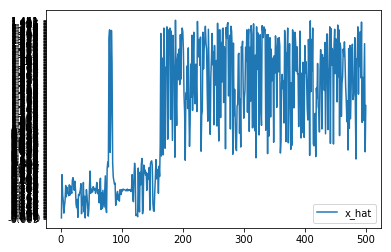

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

#  to increase the size
# fig=plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(results['ep'], results['reward'], label='x_hat')
plt.legend()
_ = plt.ylim()## TODO: Plot the rewards.


3.  In 500 episodes of training it started from nearly 0 and reached  approximately 1.3. I also test run the agent with the basic setup of initial position of (0,0,0) and velocity (0,0,0) and it performed great. with respect to the initial trails.


#### last 20 episodes resullts

    Episode =  480, score =   1.182 (best =   1.719) (r/s =   1.172)
    Episode =  481, score =   1.222 (best =   1.719) (r/s =   1.221)
    Episode =  482, score =   1.355 (best =   1.719) (r/s =   1.355)
    Episode =  483, score =   1.119 (best =   1.719) (r/s =   1.109)
    Episode =  484, score =   0.627 (best =   1.719) (r/s =   0.613)
    Episode =  485, score =   1.305 (best =   1.719) (r/s =   1.304)
    Episode =  486, score =   1.303 (best =   1.719) (r/s =   1.301)
    Episode =  487, score =   1.376 (best =   1.719) (r/s =   1.379)
    Episode =  488, score =   1.189 (best =   1.719) (r/s =   1.181)
    Episode =  489, score =   1.328 (best =   1.719) (r/s =   1.329)
    Episode =  490, score =   1.273 (best =   1.719) (r/s =   1.267)
    Episode =  491, score =   1.368 (best =   1.719) (r/s =   1.368)
    Episode =  492, score =   1.237 (best =   1.719) (r/s =   1.235)
    Episode =  493, score =   1.402 (best =   1.719) (r/s =   1.406)
    Episode =  494, score =   1.051 (best =   1.719) (r/s =   1.036)
    Episode =  495, score =   1.240 (best =   1.719) (r/s =   1.237)
    Episode =  496, score =   1.065 (best =   1.719) (r/s =   1.054)
    Episode =  497, score =   1.226 (best =   1.719) (r/s =   1.223)
    Episode =  498, score =   1.345 (best =   1.719) (r/s =   1.343)
    Episode =  499, score =   0.789 (best =   1.719) (r/s =   0.774)
    Episode =  500, score =   1.153 (best =   1.719) (r/s =   1.143)
    

#### Test Run after training

In [31]:

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
r = {x : [] for x in labels}

# Run the simulation, and save the results.
state = agent.reset_episode()
total_reward = 0
while True:
    rotor_speeds = agent.act(state)
    next_state, reward, done = task.step(rotor_speeds)
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
    for ii in range(len(labels)):
        r[labels[ii]].append(to_write[ii])
    total_reward += reward
    state = next_state
    if done:
        print("Total episode reward : {}".format(total_reward))
        total_reward = 0
        break

Total episode reward : 297.0086787439688


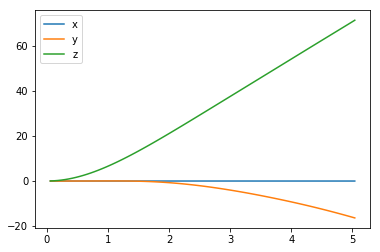

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(r['time'], r['x'], label='x')
plt.plot(r['time'], r['y'], label='y')
plt.plot(r['time'], r['z'], label='z')
plt.legend()
_ = plt.ylim()

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

- I am still a beginner, so for me I had to figure out each and every step while understanding them. In the beginning I studied the code, but the actual understanding of the project came with the time, during the training mostly. Hardest part ( or the part that forced me to think more):
	- Plotting, deciding what parameters over the time will properly show the actual behaviour of the copter during the training.
	- Reward, on what factor the reward should depend on? It was really a big Q for me but in the end I realised that directly dependent factors (like distance and velocity) can be removed to make it simple , and it really helps if we know that what can be the max/min values of the reward, hence I used 'tanh'.
	- training, different initial situations for the training also effected the end results of the copter, finally I used the  initial position of z=10 and initial z velocity of +10.

- Most amazing thing I observed in almost all of my training trails was that how the initial position and the target can effect the overall performance of the copter as if in the training we take z=0 instead of 10, it will always learn to land, although it performed bad in the training.
